## Bagging and Boosting Regression Techniques

**About dataset**
The dataset used in this project comprises historical records of insurance claims, including various predictors such as age, sex, BMI, children, smoker status, region, and historical charges. Each record also includes the corresponding insurance claim amount.

**Objective:**
The primary objective of this project is to compare the predictive performance of bagging and boosting regression techniques on insurance data. By analyzing the accuracy and reliability of these methods in estimating insurance claim amounts, the project aims to identify the most effective approach for predicting claim amounts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\archive (2)\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.shape

(1338, 7)

In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#checking for duplicate rows
duplicates = data.duplicated()
num_duplicates = sum(duplicates)
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 1


In [6]:
data=data.drop_duplicates()
data.shape

(1337, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


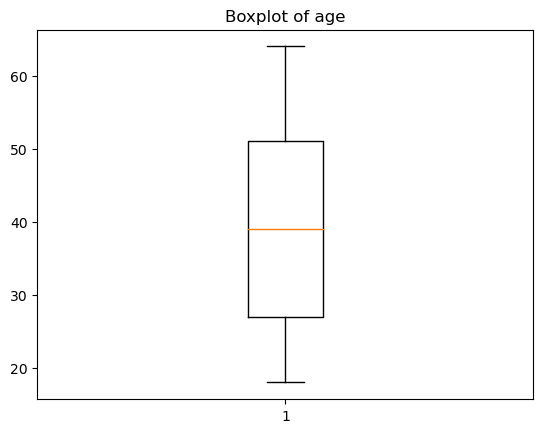

C:\Users\admin\AppData\Local\Temp\ipykernel_16936\2139078236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.clip(data[column], lower_limit, upper_limit)


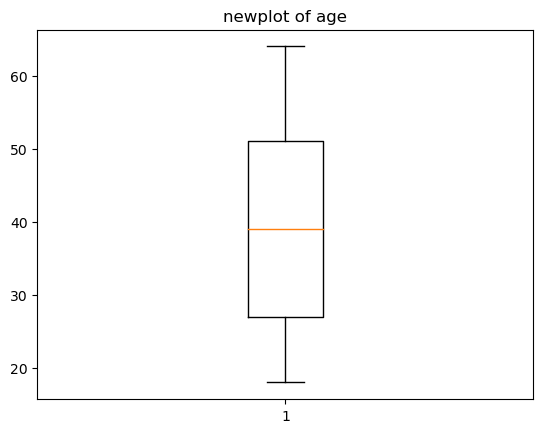

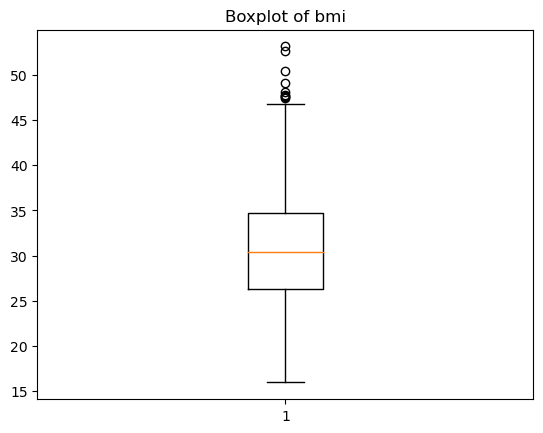

C:\Users\admin\AppData\Local\Temp\ipykernel_16936\2139078236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.clip(data[column], lower_limit, upper_limit)


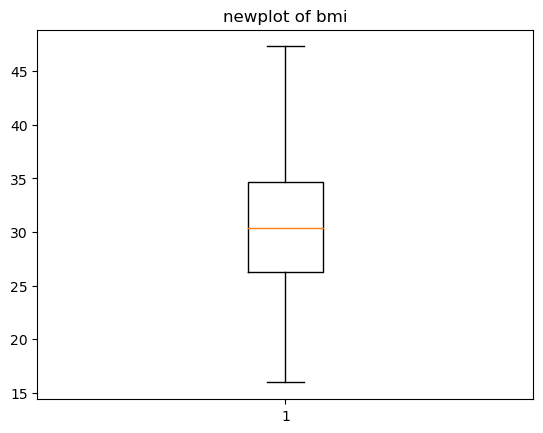

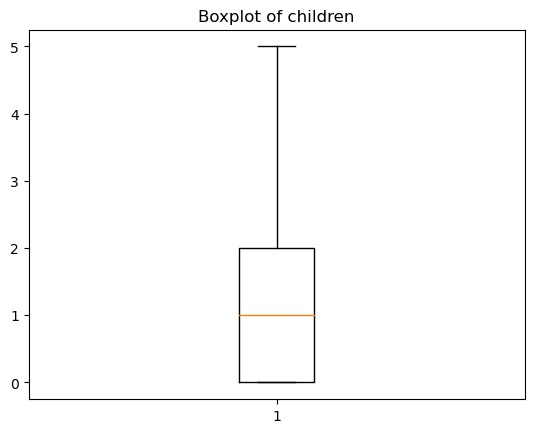

C:\Users\admin\AppData\Local\Temp\ipykernel_16936\2139078236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.clip(data[column], lower_limit, upper_limit)


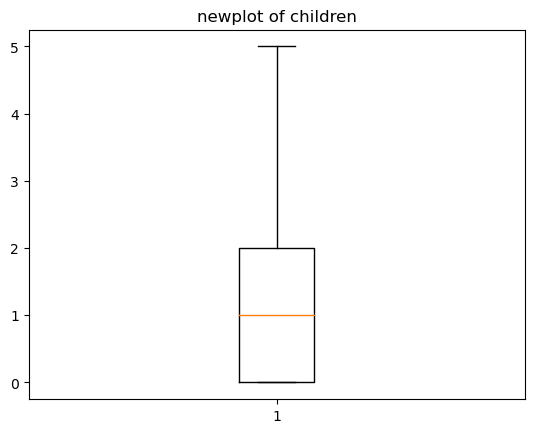

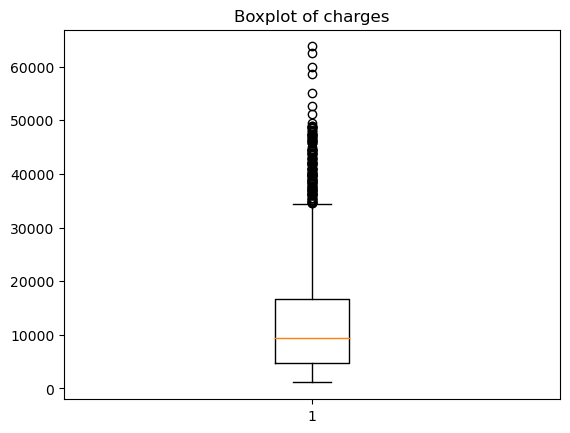

C:\Users\admin\AppData\Local\Temp\ipykernel_16936\2139078236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.clip(data[column], lower_limit, upper_limit)


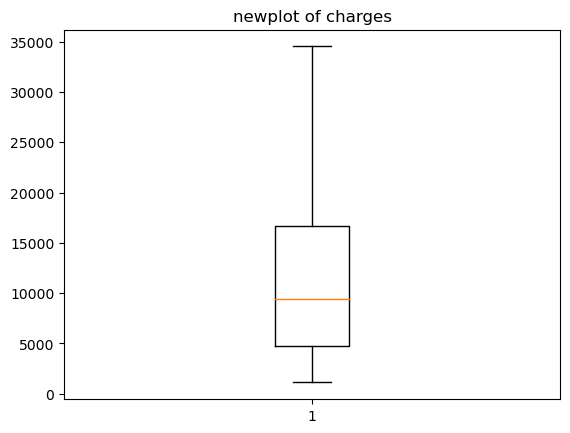

In [8]:
numerical_columns = data.select_dtypes(include=[np.number]).columns     
for column in numerical_columns:
    plt.boxplot(data[column])
    plt.title("Boxplot of "+column)
    plt.show()
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_limit = data[column].quantile(0.25) - (1.5 * IQR)
    upper_limit = data[column].quantile(0.75) + (1.5 * IQR)
    data[column] = np.clip(data[column], lower_limit, upper_limit) 
    plt.boxplot(data[column])
    plt.title("newplot of "+column)
    plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['sex']=labelencoder.fit_transform(data['sex'])
data['smoker']=labelencoder.fit_transform(data['smoker'])
data['region']=labelencoder.fit_transform(data['region'])
data


C:\Users\admin\AppData\Local\Temp\ipykernel_16936\2159975166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex']=labelencoder.fit_transform(data['sex'])
C:\Users\admin\AppData\Local\Temp\ipykernel_16936\2159975166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker']=labelencoder.fit_transform(data['smoker'])
C:\Users\admin\AppData\Local\Temp\ipykernel_16936\2159975166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Model Building

#### Random Forest-Bagging

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [11]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('charges', axis=1)  # Features
y = data['charges']  # Target variable
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(randint(3, 30).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

In [14]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)


In [15]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_squared_error', random_state=42)

In [16]:
# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
# Make predictions on the training set
y_pred_train = rf_regressor.predict(X_train)

In [18]:
# Make predictions on the testing set
y_pred_test = rf_regressor.predict(X_test)

In [19]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [20]:
print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)

Mean Squared Error (Training): 3323479.111291806
Mean Squared Error (Testing): 17608588.378618907


In [21]:
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Root Mean Squared Error (Training):", rmse_train)
print("Root Mean Squared Error (Testing):", rmse_test)


Root Mean Squared Error (Training): 1823.0411710358617
Root Mean Squared Error (Testing): 4196.258855053976


In [22]:
# Calculate R-squared (coefficient of determination)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)

R-squared (Training): 0.9666824935382767
R-squared (Testing): 0.8493107095924348


In [38]:
print("Random Forest")
print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)
print("Root Mean Squared Error (Training):", rmse_train)
print("Root Mean Squared Error (Testing):", rmse_test)
print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)


Random Forest
Mean Squared Error (Training): 3323479.111291806
Mean Squared Error (Testing): 17608588.378618907
Root Mean Squared Error (Training): 1823.0411710358617
Root Mean Squared Error (Testing): 4196.258855053976
R-squared (Training): 0.9666824935382767
R-squared (Testing): 0.8493107095924348


#### Boosting Techniques

In [24]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb

In [25]:
# Gradient Boosting
gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,  # Adjust as needed
    'random_state': 42
}

In [26]:
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(**gb_params)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_gb = gb_regressor.predict(X_train)

# Make predictions on the testing set
y_pred_test_gb = gb_regressor.predict(X_test)

In [27]:
# Evaluate the model
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
rmse_train_gb = np.sqrt(mse_train_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

In [28]:
print("Gradient Boosting:")
print("Mean Squared Error (Training):", mse_train_gb)
print("Mean Squared Error (Testing):", mse_test_gb)
print("Root Mean Squared Error (Training):", rmse_train_gb)
print("Root Mean Squared Error (Testing):", rmse_test_gb)
print("R-squared (Training):", r2_train_gb)
print("R-squared (Testing):", r2_test_gb)

Gradient Boosting:
Mean Squared Error (Training): 13905186.872738987
Mean Squared Error (Testing): 14401439.905525599
Root Mean Squared Error (Training): 3728.965925392586
Root Mean Squared Error (Testing): 3794.922911671013
R-squared (Training): 0.8606020564685072
R-squared (Testing): 0.8767565739201488


In [29]:
# AdaBoost
adaboost_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'random_state': 42
}

In [30]:
# Initialize the AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(**adaboost_params)

# Train the model
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_adaboost = adaboost_regressor.predict(X_train)

# Make predictions on the testing set
y_pred_test_adaboost = adaboost_regressor.predict(X_test)


In [31]:
# Evaluate the model
mse_train_adaboost = mean_squared_error(y_train, y_pred_train_adaboost)
mse_test_adaboost = mean_squared_error(y_test, y_pred_test_adaboost)
rmse_train_adaboost = np.sqrt(mse_train_adaboost)
rmse_test_adaboost = np.sqrt(mse_test_adaboost)
r2_train_adaboost = r2_score(y_train, y_pred_train_adaboost)
r2_test_adaboost = r2_score(y_test, y_pred_test_adaboost)


In [32]:
print("AdaBoost:")
print("Mean Squared Error (Training):", mse_train_adaboost)
print("Mean Squared Error (Testing):", mse_test_adaboost)
print("Root Mean Squared Error (Training):", rmse_train_adaboost)
print("Root Mean Squared Error (Testing):", rmse_test_adaboost)
print("R-squared (Training):", r2_train_adaboost)
print("R-squared (Testing):", r2_test_adaboost)

AdaBoost:
Mean Squared Error (Training): 22267848.654966403
Mean Squared Error (Testing): 20124005.926773477
Root Mean Squared Error (Training): 4718.882140397915
Root Mean Squared Error (Testing): 4485.978814793209
R-squared (Training): 0.776767307208335
R-squared (Testing): 0.8277844817506615


In [33]:
# XGBoost
xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,  # Adjust as needed
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

In [35]:
# Train the model
xgb_regressor = xgb.train(xgb_params, xgb.DMatrix(X_train, label=y_train))

# Make predictions on the training set
y_pred_train_xgb = xgb_regressor.predict(xgb.DMatrix(X_train))

# Make predictions on the testing set
y_pred_test_xgb = xgb_regressor.predict(xgb.DMatrix(X_test))

C:\Users\admin\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:38:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [36]:
# Evaluate the model
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)


In [37]:
print("XGBoost:")
print("Mean Squared Error (Training):", mse_train_xgb)
print("Mean Squared Error (Testing):", mse_test_xgb)
print("Root Mean Squared Error (Training):", rmse_train_xgb)
print("Root Mean Squared Error (Testing):", rmse_test_xgb)
print("R-squared (Training):", r2_train_xgb)
print("R-squared (Testing):", r2_test_xgb)

XGBoost:
Mean Squared Error (Training): 28779583.1184959
Mean Squared Error (Testing): 28045542.59719209
Root Mean Squared Error (Training): 5364.660578125693
Root Mean Squared Error (Testing): 5295.804244606487
R-squared (Training): 0.7114878973487853
R-squared (Testing): 0.7599942242844631


Gradient Boosting seems to perform the best among the three models, with the highest R-squared value on the testing set and relatively lower error metrics compared to AdaBoost and XGBoost.